# Notebook snippets, tips and tricks

**TODO**:
* Read https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
* Read http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
* howto avoid loosing matplotlib interactive rendering when a document is converted to HTML ?
  * https://www.reddit.com/r/IPython/comments/36p360/try_matplotlib_notebook_for_interactive_plots/
  * http://stackoverflow.com/questions/36151181/exporting-interactive-jupyter-notebook-to-html
  * https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/
* table of contents (JS)
* matplotlib / D3.js interaction
* matplotlib animations: how to make it faster
* inspiration
  * http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
  * https://github.com/ltiao/notebooks
  * https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/
* Howto make (personalized) Reveal.js slides from this notebook: https://forum.poppy-project.org/t/utiliser-jupyter-pour-des-presentations-etape-par-etape-use-jupyter-to-present-step-by-step/2271/2
* See https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/

Extension wishlist and todo:
- Table of content
- Hide some blocks in the HTML export
    - See https://github.com/jupyter/notebook/issues/534
- Customize CSS in HTML export
- Add disqus in HTML export
    - See: https://github.com/jupyter/nbviewer/issues/80
    - Example: http://nbviewer.jupyter.org/gist/tonyfast/977184c1243287e7e55e
- Add metadata header/footer (initial publication date, last revision date, author, email, website, license, ...)
- Vim like editor/navigation shortcut keys (search, search+edit, ...)
- Spell checking
    - See https://github.com/ipython/ipython/issues/3216#issuecomment-59507673 and http://www.simulkade.com/posts/2015-04-07-spell-checking-in-jupyter-notebooks.html
    
Inspiration:
- https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

## Import directives

In [ ]:
%matplotlib notebook

# As an alternative, one may use: %pylab notebook

# For old Matplotlib and Ipython versions, use the non-interactive version:
# %matplotlib inline or %pylab inline

# To ignore warnings (http://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython)
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets
from ipywidgets import interact

## Useful keyboard shortcuts

* Enter **edit mode**: Enter
* Enter **command mode**: Escape

In **command** mode:

* Show keyboard shortcuts: h


* Find and replace: f


* Insert a cell above the selection: a
* Insert a cell below the selection: b
* Switch to Markdown: m


* Delete the selected cells: dd (type twice 'd' quickly)
* Undo cell deletion: z


* Execute the selected cell: Ctrl + Enter
* Execute the selected cell and select the next cell: Shift + Enter
* Execute the selected cell and insert below: Alt + Enter


* Toggle output: o
* Toggle line number: l


* Copy selected cells: c
* Paste copied cells below: v


* Select the previous cell: k
* Select the next cell: j

In **edit** mode:

* Code completion or indent: Tab
* Tooltip: Shift + Tab
    * Type "Shift + Tab" twice to see the online documentation of the selected element
    * Type "Shift + Tab" 4 times to the online documentation in a dedicated frame


* Indent: ⌘]  (on MacOS)
* Dedent: ⌘[  (on MacOS)


* Execute the selected cell: Ctrl + Enter
* Execute the selected cell and select the next cell: Shift + Enter
* Execute the selected cell and insert below: Alt + Enter


* Cut a cell at the current cursor position: Ctrl + Shift + -

## Matplotlib

To plot a figure within a notebook, insert the
```%matplotlib notebook``` (or ```%pylab notebook```)
directive at the begining of the document.

As an alternative, one may use
```%matplotlib inline``` (or ```%pylab inline```)
for non-interactive plots on old Matplotlib/Ipython versions.

### 2D plots

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
y = np.sin(x)
plt.plot(x, y)

### 3D plots

In [ ]:
from mpl_toolkits.mplot3d import axes3d

# Build datas ###############

x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)

xx,yy = np.meshgrid(x, y)
z = np.sin(np.sqrt(xx**2 + yy**2))

# Plot data #################

fig = plt.figure()
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(xx, yy, z)

plt.show()

### Animations

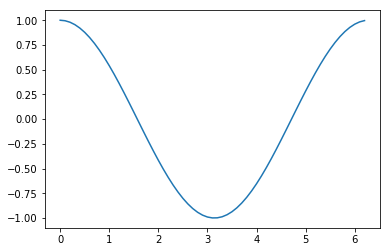

In [32]:
from matplotlib.animation import FuncAnimation

# Plots
fig, ax = plt.subplots()

def update(frame):
    x = np.arange(frame/10., frame/10. + 2. * math.pi, 0.1)
    ax.clear()
    ax.plot(x, np.cos(x))

    # Optional: save plots
    filename = "img_{:03}.png".format(frame)
    plt.savefig(filename)

# Note: "interval" is in ms
anim = FuncAnimation(fig, update, interval=100)

plt.show()

## Interactive plots with Plotly

**TODO**: https://plot.ly/ipython-notebooks/

## Interactive plots with Bokeh

**TODO**: http://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html

## Embedded HTML and Javascript

In [17]:
%%html
<div id="toc"></div>

In [31]:
%%javascript
var toc = document.getElementById("toc");
toc.innerHTML = "<b>Table of contents:</b>";
toc.innerHTML += "<ol>"

var h_list = $("h2, h3");    //$("h2");    // document.getElementsByTagName("h2");
for(var i = 0 ; i < h_list.length ; i++) {
    var h = h_list[i];
    var h_str = h.textContent.slice(0, -1);  // "slice(0, -1)" remove the last character
    if(h_str.length > 0) {
        if(h.tagName == "H2") {  // https://stackoverflow.com/questions/10539419/javascript-get-elements-tag
            toc.innerHTML += "<li><a href=\"#" + h_str.replace(/\s+/g, '-') + "\">" + h_str + "</a></li>";
        } else if(h.tagName == "H3") {  // https://stackoverflow.com/questions/10539419/javascript-get-elements-tag
            toc.innerHTML += "<li> &nbsp;&nbsp;&nbsp; <a href=\"#" + h_str.replace(/\s+/g, '-') + "\">" + h_str + "</a></li>";
        }
    }
}

toc.innerHTML += "</ol>"

<IPython.core.display.Javascript object>

## IPython built-in magic commands

See http://ipython.readthedocs.io/en/stable/interactive/magics.html

### Execute an external python script

In [ ]:
%run ./notebook_snippets_run_test.py

In [ ]:
%run ./notebook_snippets_run_mpl_test.py

### Load an external python script

#### Load the full script

In [ ]:
%load ./notebook_snippets_run_mpl_test.py

#### Load a specific symbol (funtion, class, ...)

In [ ]:
%load -s main ./notebook_snippets_run_mpl_test.py

#### Load specific lines

In [ ]:
%load -r 22-41 ./notebook_snippets_run_mpl_test.py

### Time measurement

#### %time

In [ ]:
%%time
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=100000), bins=50)

#### %timeit

In [ ]:
%%timeit
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=100000), bins=50)

## ipywidget

In [ ]:
#help(ipywidgets)
#dir(ipywidgets)

In [ ]:
from ipywidgets import IntSlider
from IPython.display import display

slider = IntSlider(min=1, max=10)
display(slider)

## ipywidgets.interact

### Documentation

See http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [ ]:
#help(ipywidgets.interact)

### Using interact as a decorator with named parameters

To me, this is the best option for single usage functions...

#### Text

In [ ]:
@interact(text="IPython Widgets")
def greeting(text):
    print("Hello {}".format(text))

#### Integer (IntSlider)

In [ ]:
@interact(num=5)
def square(num):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact(num=(0, 100))
def square(num):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact(num=(0, 100, 10))
def square(num):
    print("{} squared is {}".format(num, num*num))

#### Float (FloatSlider)

In [ ]:
@interact(num=5.)
def square(num):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact(num=(0., 10.))
def square(num):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact(num=(0., 10., 0.5))
def square(num):
    print("{} squared is {}".format(num, num*num))

#### Boolean (Checkbox)

In [ ]:
@interact(upper=False)
def greeting(upper):
    text = "hello"
    if upper:
        print(text.upper())
    else:
        print(text.lower())

#### List (Dropdown)

In [ ]:
@interact(name=["John", "Bob", "Alice"])
def greeting(name):
    print("Hello {}".format(name))

#### Dictionnary (Dropdown)

In [ ]:
@interact(word={"One": "Un", "Two": "Deux", "Three": "Trois"})
def translate(word):
    print(word)

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.1)

@interact(function={"Sin": np.sin, "Cos": np.cos})
def plot(function):
    y = function(x)
    plt.plot(x, y)

### Using interact as a decorator

#### Text

In [ ]:
@interact
def greeting(text="World"):
    print("Hello {}".format(text))

#### Integer (IntSlider)

In [ ]:
@interact
def square(num=2):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact
def square(num=(0, 100)):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact
def square(num=(0, 100, 10)):
    print("{} squared is {}".format(num, num*num))

#### Float (FloatSlider)

In [ ]:
@interact
def square(num=5.):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact
def square(num=(0., 10.)):
    print("{} squared is {}".format(num, num*num))

In [ ]:
@interact
def square(num=(0., 10., 0.5)):
    print("{} squared is {}".format(num, num*num))

#### Boolean (Checkbox)

In [ ]:
@interact
def greeting(upper=False):
    text = "hello"
    if upper:
        print(text.upper())
    else:
        print(text.lower())

#### List (Dropdown)

In [ ]:
@interact
def greeting(name=["John", "Bob", "Alice"]):
    print("Hello {}".format(name))

#### Dictionnary (Dropdown)

In [ ]:
@interact
def translate(word={"One": "Un", "Two": "Deux", "Three": "Trois"}):
    print(word)

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.1)

@interact
def plot(function={"Sin": np.sin, "Cos": np.cos}):
    y = function(x)
    plt.plot(x, y)

### Using interact as a function

To me, this is the best option for multiple usage functions...

#### Text

In [ ]:
def greeting(text):
    print("Hello {}".format(text))
    
interact(greeting, text="IPython Widgets")

#### Integer (IntSlider)

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=5)

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=(0, 100))

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=(0, 100, 10))

#### Float (FloatSlider)

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=5.)

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=(0., 10.))

In [ ]:
def square(num):
    print("{} squared is {}".format(num, num*num))

interact(square, num=(0., 10., 0.5))

#### Boolean (Checkbox)

In [ ]:
def greeting(upper):
    text = "hello"
    if upper:
        print(text.upper())
    else:
        print(text.lower())

interact(greeting, upper=False)

#### List (Dropdown)

In [ ]:
def greeting(name):
    print("Hello {}".format(name))

interact(greeting, name=["John", "Bob", "Alice"])

#### Dictionnary (Dropdown)

In [ ]:
def translate(word):
    print(word)

interact(translate, word={"One": "Un", "Two": "Deux", "Three": "Trois"})

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.1)

def plot(function):
    y = function(x)
    plt.plot(x, y)

interact(plot, function={"Sin": np.sin, "Cos": np.cos})

### Example of using multiple widgets on one function

In [ ]:
@interact(upper=False, name=["john", "bob", "alice"])
def greeting(upper, name):
    text = "hello {}".format(name)
    if upper:
        print(text.upper())
    else:
        print(text.lower())

## Sound player widget

See: https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.Audio

In [ ]:
from IPython.display import Audio

### Generate a sound

In [ ]:
framerate = 44100
t = np.linspace(0, 5, framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)

Audio(data, rate=framerate)

### Generate a multi-channel (stereo or more) sound

In [ ]:
data_left = np.sin(2 * np.pi * 220 * t)
data_right = np.sin(2 * np.pi * 224 * t)

Audio([data_left, data_right], rate=framerate)

### From URL

In [ ]:
Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")

In [ ]:
Audio(url="http://www.w3schools.com/html/horse.ogg")

### From file

In [ ]:
#Audio('/path/to/sound.wav')

In [ ]:
#Audio(filename='/path/to/sound.ogg')

### From bytes

In [ ]:
#Audio(b'RAW_WAV_DATA..)

In [ ]:
#Audio(data=b'RAW_WAV_DATA..)

## Youtube widget

Class for embedding a YouTube Video in an IPython session, based on its video id.
e.g. to embed the video from https://www.youtube.com/watch?v=0HlRtU8clt4 , you would do:

See https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.YouTubeVideo

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
vid = YouTubeVideo("0HlRtU8clt4")
display(vid)

## Convert a Reveal.js presentation written with Markdown to a Jupyter notebook

This is a **quick and dirty hack** to have one cell per slide in the notebook; it assumes the string "---" is used to separate slides within the markdown file.

1. copy the markdown document within the Jupyter notebook (in a Markdown cell), save it and close it;
2. to split this cell at each "---", open the ipynb notebook with vim and enter the following command and save the file:

```
:%s/,\n    "---\\n",/\r   ]\r  },\r  {\r   "cell_type": "markdown",\r   "metadata": {},\r   "source": [/gc
```